# UBER DATA ANALYSIS AND VISUALIZATION PROJECT

In this project, named as UBER DATA ANALYSIS we get a raw dataset from github and read with pandas.read_csv method, after then we will analyse the data and will generate beautiful plots and graphes by using seaborn and pylab(whuch is contain numpy as well as matplotlib numspace.

In [4]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [8]:
data = pandas.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [10]:
dt = '4/1/2014 0:11:00' #by using split method we can see seperate day month and year of this date.

In [15]:
dt = pandas.to_datetime(dt)
dt

Timestamp('2014-04-01 00:11:00')

# Convert DATE AND TIME and add some useful columns.

In [16]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime) #it is taking every element from Date/Time column of the dataset and mapping with above function to convert it into readable form.

In [18]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [22]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

In [23]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [29]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)

In [30]:
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [31]:
data.describe()


,Lat,Lon,dom,weekday,hour
count,564516.000000,564516.000000,564516.000000,564516.00000,564516.000000
mean,40.740005,-73.976817,16.117127,2.86698,14.465043
std,0.036083,0.050426,9.048139,1.82081,5.873925
min,40.072900,-74.773300,1.000000,0.00000,0.000000
25%,40.722500,-73.997700,8.000000,1.00000,10.000000
50%,40.742500,-73.984800,16.000000,3.00000,16.000000
75%,40.760700,-73.970000,24.000000,4.00000,19.000000
max,42.116600,-72.066600,30.000000,6.00000,23.000000


# ANALYSIS

# analyse the DoM

Text(0.5, 1.0, 'freequency by DoM - Uber apr 2014')

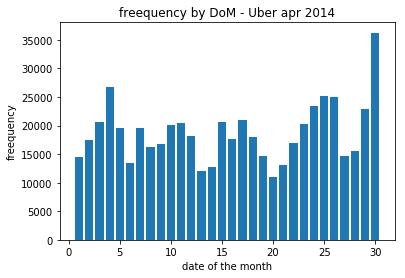

In [36]:
#ses.distplot(data.dom, bins=30).set_title("freequency by dom")
hist(data.dom, bins =30, rwidth=.8, range=(0.5, 30.5))

#bins telling us the number of patches we want to used inside the graph
#rwidth shows the distance between every line of graph (THE MORE DISTANCE THE LESS SPACE)
#range function work on X axix as the graph starting and ending point.
xlabel("date of the month")
ylabel("freequency")
title("freequency by DoM - Uber apr 2014")

In [40]:
#for k,rows in data.groupby('dom'):
    #print((k, len(rows))) #it will give the number of records by the perticular day.
    #print((k, rows)) #it will give the all records with corresponding day/
    

In [41]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date


dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

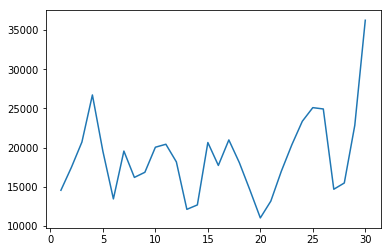

In [43]:
plot(by_date) #it will give curve
# fro bar graph bar(range(x,y), variable)

In [45]:
by_date_sorted = by_date.sort_values()


Text(0.5, 1.0, 'freequency by DoM - Uber apr 2014')

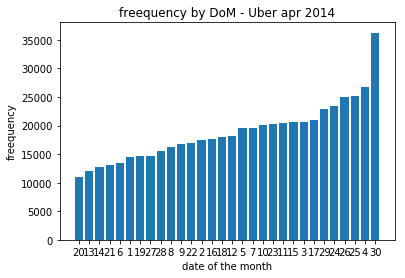

In [49]:
bar(range(1,31),by_date_sorted) #by this we have a sorted data
xticks(range(1,31), by_date_sorted.index);
xlabel("date of the month")
ylabel("freequency")
title("freequency by DoM - Uber apr 2014")

# Analyse by hour

Text(0, 0.5, 'freequency')

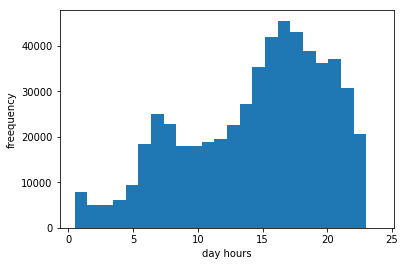

In [52]:
hist(data.hour, bins=24, range=(.5, 24))
xlabel("day hours")
ylabel("freequency")

# Analyse by weekday

([<matplotlib.axis.XTick at 0x7fd36ce8f320>,
 <a list of 7 Text xticklabel objects>)

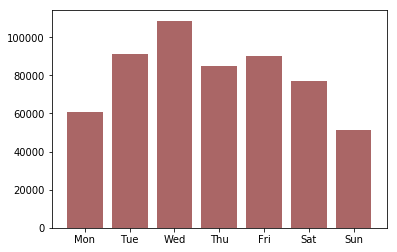

In [60]:
hist(data.weekday, bins= 7, range=(-.5,6.5),rwidth=.8, color="#AA6666",alpha=1)#alpha is use for the brightning and darkning of color.
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

# Cross Analysis (hour, dow)

In [68]:
#data.groupby('hour weekday'.split()).apply(count_rows)
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

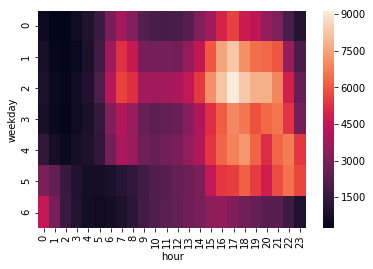

In [69]:
seaborn.heatmap(by_cross)

# by lat and lon

(array([4.0000e+00, 2.0000e+00, 6.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+01,
        7.0000e+00, 1.2000e+01, 9.0000e+00, 7.0000e+00, 2.0000e+01,
        1.0500e+02, 7.9000e+01, 1.0200e+02, 9.8000e+01, 1.7800e+02,
        2.3100e+02, 1.7200e+02, 3.2300e+02, 3.5400e+02, 4.2100e+02,
        3.7500e+02, 4.8200e+02, 5.2400e+02, 5.2530e+03, 7.0920e+03,
        8.2400e+02, 1.0590e+03, 1.5950e+03, 2.2880e+03, 3.9330e+03,
        5.3600e+03, 5.1670e+03, 7.4290e+03, 7.3860e+03, 4.7400e+03,
        7.4340e+03, 1.3992e+04, 1.5407e+04, 2.7908e+04, 4.0500e+04,
        3.4008e+04, 3.1918e+04, 3.3257e+04, 3.9590e+04, 3.1907e+04,
        3.7967e+04, 4.7042e+04, 4.4288e+04, 2.6032e+04, 2.6114e+04,
        1.6762e+04, 1.0481e+04, 6.4760e+03, 3.5860e+03, 2.1260e+03,
        1.8280e+03, 1.9020e+03, 8.7500e+02, 6.8100e+02, 6.0500e+02,
        7.3400e+02, 4.4100e+02, 3.3400e+02, 4.2700e+02, 2.9900e+02,
        5.2700e+02, 3.4300e+02, 2.7500e+02, 2.49

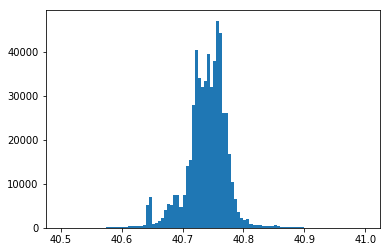

In [73]:
hist(data['Lat'], bins = 100,range =(40.5,41))

''

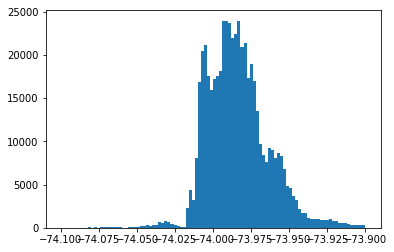

In [78]:
hist(data['Lon'],bins = 100, range=(-74.1,-73.9))
;

''

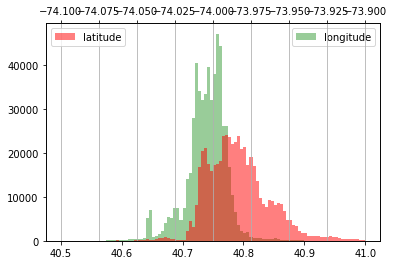

In [91]:
hist(data['Lat'], bins = 100,range =(40.5,41),color ='green',alpha=.4,label="longitude")
legend(loc= "upper right")
twiny()
hist(data['Lon'],bins = 100, range=(-74.1,-73.9),color ='r', alpha=.5,label = "latitude")
legend(loc= "upper left")
grid()
;

from above figure, it is clear that both visualization are unimodal. Range for longitudenal is lying beteen 40.55 to 40.87(approx ). For latitude,it is approx 40.6 to 40.88.
and we can check it by describe methiod.

Thanking you.